In [2]:
from os import fsdecode
import subprocess
import math
import json
from numpy import linalg as la, ma
import numpy as np
import time
import os
import julian
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import linalg
from scipy.spatial.transform import Rotation as R
from scipy.spatial import distance
from datetime import datetime as dt
from tqdm import tqdm
import uuid
import sys
from pprint import pprint
import shutil
import astropy
import scipy.stats
import numpy as np
import sys
import seaborn as sns
from datetime import datetime
from astropy.utils import iers
from astropy.time import Time

In [39]:
fap_dir =  '/home/flaeuferts/lorenz_data_fap_day/fap_day/'
fap_list = os.listdir(fap_dir)

prediction_data = []

with open('/home/flaeuferts/lorenz_data_fap_day/fap_day/fap_day_2016-04-10.dat', 'r') as f:
    reference_file = f.readlines()

pred_index = 1
pred_index_list = []
for file in tqdm(fap_list):
    file_path = os.path.join(fap_dir, file)
    with open(file_path, 'r') as f:
        lines = f.readlines()

    day_data = []
    day = 1
    for i in range(14000, len(lines)):
        line = list(lines[i])
        line[22] = ' '
        line[14] = ' '
        line[18] = ' '
        split_line = ''.join(line).split()

        if split_line[-1] == '0-0-0-0-0-0-0-0-':
            date_string = datetime.strptime(split_line[0], '%d/%m/%Y')
            pred_f10 = int(split_line[1])
            pred_f3m = int(split_line[2])
            pred_ssn = int(split_line[3])
            pred_ap = int(split_line[4])

            for reference_line in reference_file:
                split_line_ref = reference_line.split()
                if split_line[0] == split_line_ref[0]:
                    ref_f10 = int(split_line_ref[1])
                    ref_f3m = int(split_line_ref[2])
                    ref_ssn = int(split_line_ref[3])
                    ref_ap = int(split_line_ref[4])
                    break
            
            delta_f10 = pred_f10 - ref_f10
            delta_f3m = pred_f3m - ref_f3m
            delta_ssn = pred_ssn - ref_ssn
            delta_ap = pred_ap - ref_ap

            data = [pred_index,day,date_string,
                pred_f10, ref_f10, delta_f10, 
                pred_f3m, ref_f3m, delta_f3m, 
                pred_ssn, ref_ssn, delta_ssn, 
                pred_ap, ref_ap, delta_ap]
            day = day + 1
            prediction_data.append(data)
            if day > 27:
                pred_index = pred_index + 1


df = pd.DataFrame(prediction_data, columns = ['prediction_index','lead', 'day', 
'pred_F10','act_F10', 'delta_F10', 
'pred_F3M', 'act_F3M','delta_F3M', 
'pred_SSN', 'act_SSN','delta_SSN',
'pred_Ap', 'act_Ap','delta_Ap'])
df

100%|██████████| 5946/5946 [20:20<00:00,  4.87it/s]


,prediction_index,lead,day,pred_F10,act_F10,delta_F10,pred_F3M,act_F3M,delta_F3M,pred_SSN,act_SSN,delta_SSN,pred_Ap,act_Ap,delta_Ap
0,1,1,2014-03-13,151,148,3,159,158,1,100,130,-30,3,11,-8
1,1,2,2014-03-14,150,144,6,159,158,1,99,121,-22,2,5,-3
2,1,3,2014-03-15,152,139,13,159,158,1,102,141,-39,2,3,-1
3,1,4,2014-03-16,150,136,14,159,158,1,100,139,-39,2,2,0
4,1,5,2014-03-17,151,136,15,159,158,1,101,110,-9,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160510,5945,23,2005-01-05,99,88,11,105,105,0,45,11,34,4,17,-13
160511,5945,24,2005-01-06,98,83,15,105,105,0,44,12,32,5,4,1
160512,5945,25,2005-01-07,98,83,15,105,105,0,44,11,33,6,40,-34
160513,5945,26,2005-01-08,97,88,9,105,105,0,43,10,33,6,36,-30


In [31]:
fap_dir =  '/home/flaeuferts/solmag_daily_predictions/'
fap_list = os.listdir(fap_dir)

prediction_data = []

with open('/home/flaeuferts/solmag_daily_predictions/fap_day.dat', 'r') as f:
    reference_file = f.readlines()

pred_index = 1
pred_index_list = []
for file in tqdm(fap_list):
    file_path = os.path.join(fap_dir, file)
    with open(file_path, 'r') as f:
        lines = f.readlines()

    day_data = []
    day = 1
    for i in range(2, len(lines)):
        split_line = lines[i].split()


        if split_line[-1] == '0-0-0-0-0-0-0-0-':
            date_string = datetime.strptime(split_line[0], '%d/%m/%Y')
            pred_f10 = int(split_line[1])
            pred_f3m = int(split_line[2])
            pred_ssn = int(split_line[3])
            pred_ap = int(split_line[4])

            for reference_line in reference_file:
                split_line_ref = reference_line.split()
                if split_line[0] == split_line_ref[0]:
                    ref_f10 = int(split_line_ref[1])
                    ref_f3m = int(split_line_ref[2])
                    ref_ssn = int(split_line_ref[3])
                    ref_ap = int(split_line_ref[4])
                    break
            
            delta_f10 = pred_f10 - ref_f10
            delta_f3m = pred_f3m - ref_f3m
            delta_ssn = pred_ssn - ref_ssn
            delta_ap = pred_ap - ref_ap

            data = [pred_index,day,date_string,
                pred_f10, ref_f10, delta_f10, 
                pred_f3m, ref_f3m, delta_f3m, 
                pred_ssn, ref_ssn, delta_ssn, 
                pred_ap, ref_ap, delta_ap]
            day = day + 1
            prediction_data.append(data)
            if day > 27:
                pred_index = pred_index + 1


df_new = pd.DataFrame(prediction_data, columns = ['prediction_index','lead', 'day', 
'pred_F10','act_F10', 'delta_F10', 
'pred_F3M', 'act_F3M','delta_F3M', 
'pred_SSN', 'act_SSN','delta_SSN',
'pred_Ap', 'act_Ap','delta_Ap'])
df_new

100%|██████████| 5814/5814 [03:52<00:00, 25.02it/s]


,prediction_index,lead,day,pred_F10,act_F10,delta_F10,pred_F3M,act_F3M,delta_F3M,pred_SSN,act_SSN,delta_SSN,pred_Ap,act_Ap,delta_Ap
0,1,1,2006-10-26,74,72,2,77,77,0,20,0,20,4,2,2
1,1,2,2006-10-27,75,72,3,77,77,0,23,13,10,3,4,-1
2,1,3,2006-10-28,76,74,2,77,77,0,24,13,11,3,14,-11
3,1,4,2006-10-29,76,73,3,77,77,0,24,0,24,2,21,-19
4,1,5,2006-10-30,74,75,-1,77,77,0,21,13,8,2,10,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156973,5814,23,2007-10-27,67,67,0,69,68,1,0,0,0,9,13,-4
156974,5814,24,2007-10-28,68,67,1,69,68,1,0,0,0,9,7,2
156975,5814,25,2007-10-29,68,67,1,69,68,1,0,0,0,12,13,-1
156976,5814,26,2007-10-30,68,67,1,69,68,1,0,0,0,13,10,3


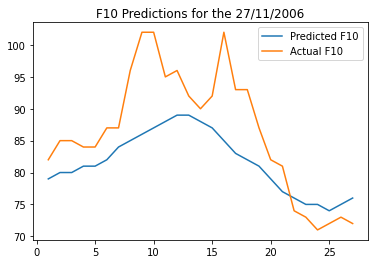

In [32]:
i = 67

title_string = 'F10 Predictions for the ' + list(df.loc[df['prediction_index']==i]['day'])[0].strftime('%d/%m/%Y')
plt.title(title_string)
plt.plot(list(df.loc[df['prediction_index']==i]['prediction_day']),list(df.loc[df['prediction_index']==i]['pred_F10']), label='Predicted F10')
plt.plot(list(df.loc[df['prediction_index']==i]['prediction_day']),list(df.loc[df['prediction_index']==i]['act_F10']), label='Actual F10')
plt.legend()

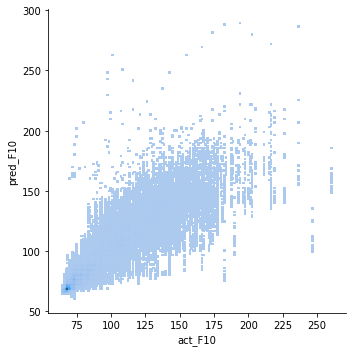

In [58]:
sns.displot(df, x= 'act_F10', y= 'pred_F10')

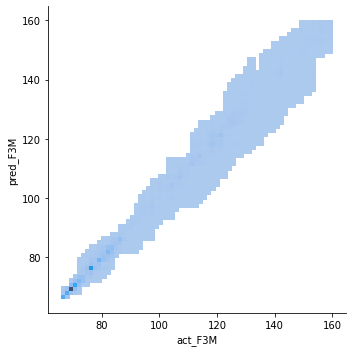

In [59]:
sns.displot(df, x= 'act_F3M', y= 'pred_F3M')

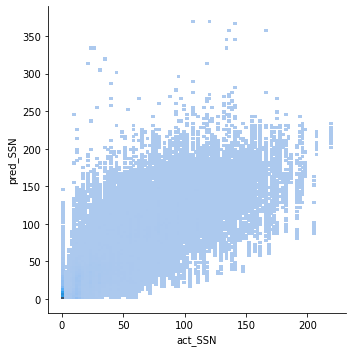

In [60]:
sns.displot(df, x= 'act_SSN', y= 'pred_SSN')

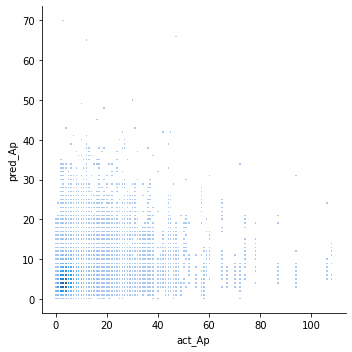

In [61]:
sns.displot(df, x= 'act_Ap', y= 'pred_Ap')

In [52]:
df['firstweek'] = df.apply(lambda row: row.prediction_day<13, axis=1)

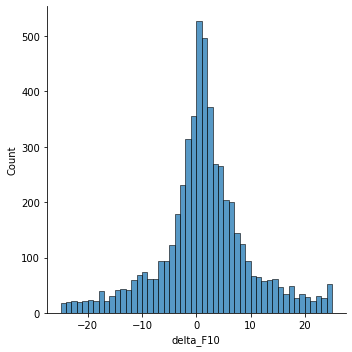

In [43]:
sns.displot(x=df_new.loc[df_new['lead']==15]['delta_F10'],binwidth=1,  binrange=(-25,25),multiple="stack")

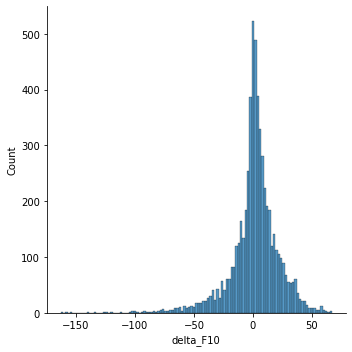

In [48]:
sns.displot(x=df.loc[df['lead']==15]['delta_F10'],binwidth=2)

In [79]:
df.loc[(df['delta_F10']>25) & (df['lead']==1)]

,prediction_index,lead,day,pred_F10,act_F10,delta_F10,pred_F3M,act_F3M,delta_F3M,pred_SSN,act_SSN,delta_SSN,pred_Ap,act_Ap,delta_Ap
6534,243,1,2017-09-05,201,120,81,79,79,0,245,119,126,13,11,2
12150,451,1,2015-06-23,241,116,125,128,127,1,303,45,258,34,72,-38
19467,722,1,2015-06-24,153,109,44,127,127,0,171,36,135,45,16,29
20331,754,1,2011-09-25,195,168,27,106,107,-1,237,122,115,3,4,-1
36558,1355,1,2014-01-05,272,217,55,147,148,-1,346,134,212,7,3,4
49923,1850,1,2012-01-28,140,114,26,141,141,0,150,45,105,8,6,2
84051,3114,1,2014-08-26,155,128,27,127,127,0,173,86,87,2,3,-1
116424,4313,1,2011-03-09,170,143,27,90,91,-1,198,113,85,5,4,1
130572,4837,1,2014-01-08,231,194,37,150,151,-1,289,107,182,5,7,-2


In [102]:
print(skew(df.loc[df['lead']==27]['delta_F10']))

-1.0950786133479722


In [109]:
len(df.loc[df['lead']==1]['delta_F10'])

5814

In [112]:
mu, std = norm.fit(df.loc[df['lead']==1]['delta_F10'])

In [14]:
# function for mapping the pdf
def map_pdf(x, **kwargs):
    mu, std = norm.fit(x)
    x0, x1 = p1.axes[0][0].get_xlim()  # axes for p1 is required to determine x_pdf
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = norm.pdf(x_pdf, mu, std)
    plt.plot(x_pdf, y_pdf, c='r')

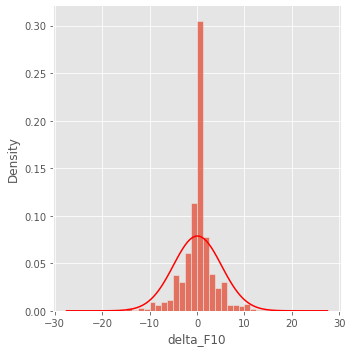

In [22]:
data=df.loc[df['lead']==1]
p1 = sns.displot(data=data, x='delta_F10', kind='hist', bins=40, stat='density', binrange=(-25,25))
p1.map(map_pdf, 'delta_F10')

In [119]:
# function for mapping the pdf
def burr_map_pdf(x, **kwargs):
    x, c, d = burr.fit(x)
    x0, x1 = p1.axes[0][0].get_xlim()  # axes for p1 is required to determine x_pdf
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = burr.pdf(x_pdf, c, d)
    plt.plot(x_pdf, y_pdf, c='r')

<AxesSubplot:ylabel='Frequency'>

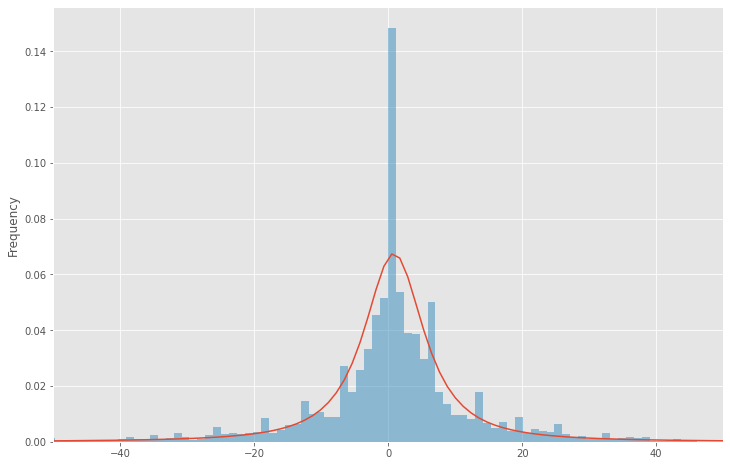

In [50]:
# Try laplace regression
import scipy.stats as st
lead = 15
distribution = getattr(st, 't')
bins=200

data=df.loc[df['lead']==lead]['delta_F10']
params = distribution.fit(data)

# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]



y, x = np.histogram(data, bins=bins, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)

plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=bins, density=True, alpha=0.5, xlim=(-50,50), color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])
pd.Series(pdf, x).plot(ax=ax)

In [4]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
#data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
data = df.loc[df['lead']==20]['delta_F10']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=100, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Delta F10 day 1\n All Fitted Distributions')
ax.set_xlabel(u'Delta F10')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=100, xlim=[-25,25], density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'Delta F10. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Delta F10')
ax.set_ylabel('Frequency')

NameError: name 'df' is not defined